<a href="https://colab.research.google.com/github/brayvid/FrogProblem/blob/master/frogproblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Frog Problem
###Presented by Timandra Harkness and Matt Parker in [Can you solve The Frog Problem?](https://www.youtube.com/watch?v=ZLTyX4zL2Fc)
###Solution by Blake Rayvid


In [0]:
from scipy.special import comb # nCr function
from itertools import combinations # lists all combinations
from matplotlib import pyplot
import numpy as np

In [0]:
# Each row represents a possible route across the river
def routeMatrix(n, k):
  rows = comb(n - 1, k - 1, 1) # third arg means return exact integer result
  cols = k + 1
  M = [[0 for x in range(cols)] for y in range(rows)] # create blank M
  
  C = list(combinations(range(1, n), k - 1))
  
  for l in range(len(C[0])):
    for r in range(rows):
      M[r][l + 1] = C[r][l]
      
  for r in range(rows):
    M[r][cols - 1] = n
  
  return M

In [0]:
# Multiply probabilities across each row then sum all products
def pathLengthProbability(n, k, m):
  iLower = 1
  iUpper = comb(n - 1, k - 1, 1)
  jLower = 1
  jUpper = k
  
  sumTot = 0
  for i in range(iLower - 1, iUpper):
    prod = 1
    for j in range(jLower - 1, jUpper):
      factor = 1 / (n - m[i][j])
      prod = prod * factor
    sumTot += prod
  
  return sumTot

In [0]:
# Wrapper function for ease of use
def getProb(n, k):
  if k <= n and k >= 1:
    return pathLengthProbability(n, k, routeMatrix(n, k))
  else:
    print("Bad input")
    return 0

In [5]:
# Check that total probability is 1 for several n
for n in range(1, 16):
  s = 0
  for k in range(1, n + 1):
    s += getProb(n, k)
  print(s)
  

1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
0.9999999999999997
0.9999999999999994
0.9999999999999997


In [0]:
# Calculate expected number of jumps
def expectedValue(n):
  sumTot = 0
  for k in range(1, n + 1):
    sumTot += (k * getProb(n, k))
  return sumTot

In [7]:
expectedValue(10)

2.9289682539682538

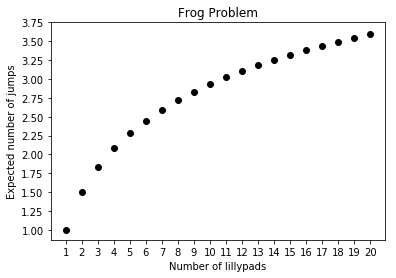

In [8]:
# Plot expectation for several values of n
ns = range(1, 21)
exps = []
for n in ns:
  exps.append(expectedValue(n))
pyplot.plot(ns,exps,'ko')
pyplot.xlabel('Number of lillypads')
pyplot.ylabel('Expected number of jumps')
pyplot.title('Frog Problem')
pyplot.xticks(np.arange(min(ns), max(ns) + 1, 1))
pyplot.yticks(np.arange(min(exps), max(exps) + 0.25, 0.25))
pyplot.show()